# **ЛР №2-2**: Работа с цветами в облаках точек с использованием Python, NumPy, Matplotlib и Plotly

## Цели работы
Изучить основы визуализации облаков точек и работы с цветовыми схемами, используя Python, NumPy, Matplotlib и Plotly, а также освоить методы назначения цветов на основе геометрических свойств точек.

## Задачи работы
1. Сгенерировать облако точек размером $ N = 1000 $, равномерно распределённое в пределах куба $[0, 1]^3$.
2. Назначить каждому элементу облака цвет, используя координаты точки как компоненты цвета: $ R = X, G = Y, B = Z $, обеспечив нормализацию значений в диапазоне $[0,1]$.
3. Выполнить 2D-визуализацию облака точек в проекции на плоскость XY средствами Matplotlib, применяя назначенные цвета.
4. Реализовать 3D-интерактивную визуализацию точечного облака с помощью Plotly, отображая для каждой точки её положение и цвет.
5. *(Дополнительно)* Создать альтернативную схему раскраски, основанную на расстоянии от центра куба: вычислить расстояние каждой точки до центра $(0.5, 0.5, 0.5)$, выполнить нормализацию расстояний, применить colormap (например, `viridis`) для получения RGB-цветов.

## Теоретическая часть

### 1. Что такое облако точек?
Облако точек — это совокупность точек в трёхмерном пространстве, каждая из которых характеризуется своими координатами $(X, Y, Z)$. Часто используется для представления поверхностей реальных объектов, полученных с 3D-сканеров или сенсоров (например, лидаров).

### 2. Как представляется цвет в RGB?
Цвет в модели RGB задаётся тремя компонентами: красным (R), зелёным (G) и синим (B). В Python значения обычно нормализуются к диапазону $[0, 1]$, что удобно для вычислений. Для отображения на экранах значения часто конвертируются в диапазон $[0, 255]$.

### 3. Отличие визуализации в Matplotlib и Plotly
- **Matplotlib** — библиотека для создания статичных графиков, удобна для публикаций и отчётов.
- **Plotly** — обеспечивает интерактивную 3D-визуализацию: пользователь может вращать, масштабировать и перемещать сцену, что особенно полезно при анализе пространственных данных.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Шаг 1. Генерация облака точек

In [2]:
N = 1000
points = np.random.rand(N, 3) # X, Y, Z

## Шаг 2. Назначение цветов на основе координат

Каждая координата используется как компонент RGB-цвета:
- $ R = X $
- $ G = Y $
- $ B = Z $

Поскольку значения уже находятся в диапазоне $[0, 1]$, дополнительная нормализация не требуется.

In [3]:
colors = points.copy()

## Шаг 3. 2D-визуализация с помощью Matplotlib

Отображаем проекцию облака точек на плоскость $XY$, применяя назначенные RGB-цвета.

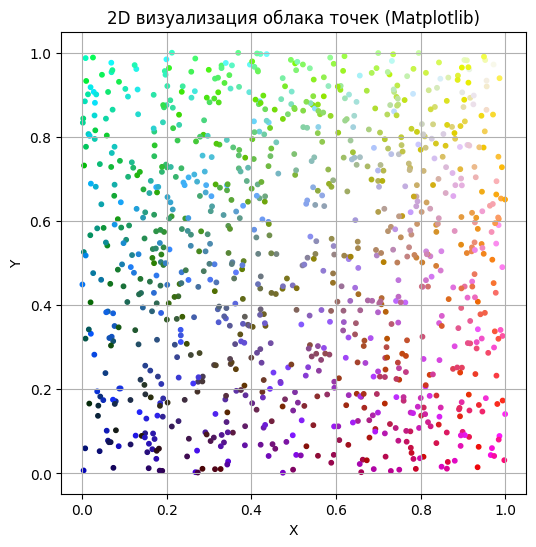

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D визуализация облака точек (Matplotlib)")
plt.grid(True)
plt.show()

## Шаг 4. 3D-интерактивная визуализация с помощью Plotly

Каждая точка отображается в 3D с цветом, заданным в формате `'rgb(r, g, b)'`, где компоненты — целые числа от 0 до 255.

In [23]:
fig = go.Figure(
    data=[
        go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=['rgb({},{},{})'.format(int(r*255), int(g*255), int(b*255)) for r, g, b in colors],
            )
        )
    ])

fig.update_layout(title='3D визуализация облака точек (Plotly)',
scene=dict(
xaxis_title='X',
yaxis_title='Y',
zaxis_title='Z'))

fig.show()

## Шаг 5. Дополнительная раскраска (по расстоянию до центра)

Вычисляем расстояние каждой точки до центра куба $(0.5, 0.5, 0.5)$, нормализуем его и применяем colormap `viridis`.

## Альтернативная схема раскраски

In [28]:
center = np.array([0.5, 0.5, 0.5])
dist = np.linalg.norm(points - center, axis=1)
norm_dist = (dist - dist.min()) / (dist.max() - dist.min()) # нормализация
colors_alt = plt.cm.viridis(norm_dist)[:, :3] # RGB из colormap

In [29]:
colors_alt_plotly = [
    'rgb({},{},{})'.format(int(r * 255), int(g * 255), int(b * 255))
    for r, g, b in colors_alt
]

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:, 0],
            y=points[:, 1],
            z=points[:, 2],
            mode='markers',
            marker=dict(
                size=3,
                color=colors_alt_plotly,
            ),
        )
    ]
)

fig.show()


## Ответы на теоретические вопросы

1. **Почему для RGB значения используются числа от 0 до 1 или от 0 до 255?**  
   Диапазон $[0, 1]$ удобен для вычислений и внутреннего представления цвета в библиотеках типа NumPy и Matplotlib. Диапазон $[0, 255]$ соответствует 8-битному представлению цвета на большинстве устройств. Оба подхода эквивалентны при корректном преобразовании.

2. **Как можно задать цвет точек на основе скалярной величины?**  
   Скалярную величину (например, высоту, расстояние или температуру) сначала нормализуют к диапазону $[0, 1]$, затем передают в colormap (например, `viridis`, `plasma`), который преобразует её в RGB.

3. **Чем отличается статичная визуализация (Matplotlib) от интерактивной (Plotly)?**  
   Matplotlib подходит для создания изображений, готовых к вставке в отчёты. Plotly создаёт интерактивные графики, где пользователь может вращать сцену, изменять масштаб и изучать данные под разными углами.

4. **Можно ли использовать другую цветовую карту (colormap) в Matplotlib? Как?**  
   Да. Достаточно указать параметр `cmap` в функции `plt.scatter()`, например:  
   ```python
   plt.scatter(x, y, c=data, cmap='plasma')

   Доступны десятки схем: 'viridis', 'plasma', 'coolwarm', 'jet' и др.

5. **Что произойдёт, если не нормализовать значения при генерации цветов?**
   Если значения выходят за пределы [0,1], библиотеки могут обрезать их до границ, привести к белому/чёрному или выдать ошибку. Это приведёт к искажению цветовой схемы и затруднит интерпретацию.

## Выводы

В ходе работы были освоены базовые методы генерации и визуализации облаков точек с цветовой информацией. Показано, как цвет можно использовать не только для эстетики, но и как канал визуализации дополнительных данных — например, координат или расстояний.

Matplotlib подходит для простых 2D-проекций и публикаций, тогда как Plotly открывает возможности интерактивного анализа 3D-данных. Такой подход особенно актуален при работе со сложными пространственными сценами, где статичной проекции недостаточно.

Методы, изученные в рамках задания, находят применение в робототехнике (навигация по картам), компьютерном зрении (сегментация и классификация объектов), геоинформатике (анализ рельефа) и других областях, где визуальная интерпретация 3D-данных критична.